<a href="https://colab.research.google.com/github/Gerenzeo/data_science_module_2/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/bestsellers with categories.csv")

In [3]:
data.columns = ["name", "author",  "user_rating",  "reviews", "price", "year", "genre"]

In [ ]:
print(data)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

# **Первинне дослідження даних**


1. Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [ ]:
checked_data = data.isna().sum()
print(checked_data)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Чи є в якихось змінних пропуски? (Так / ні)

Відповідь: Ні

2. Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [ ]:
print(data["genre"].unique())

['Non Fiction' 'Fiction']


Які є унікальні жанри?

Відповідь:
* Non Fiction
* Fiction

3. Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

In [ ]:
import matplotlib.pyplot as plt

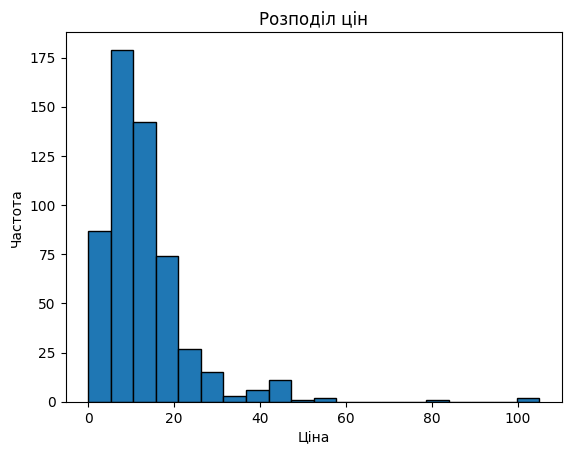

In [ ]:
data["price"].plot(kind="hist", bins=20, edgecolor="black")

plt.title('Розподіл цін', fontsize=15)
plt.xlabel("Ціна")
plt.ylabel("Частота")

plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

* Максимальна ціна?
* Мінімальна ціна?
* Середня ціна?
* Медіанна ціна?

In [ ]:
print("Max: ", data["price"].max())
print("Min: ", data["price"].min())
print("AVG: ", data["price"].mean())
print("Median: ", data["price"].median())

Max:  105
Min:  0
AVG:  13.1
AVG:  11.0


# **Пошук та сортування даних**

Який рейтинг у датасеті найвищий?

In [ ]:
print(data["user_rating"].max())

4.9


Відповідь: 4.9

Скільки книг мають такий рейтинг?

In [ ]:
max_rating = data["user_rating"].max()
count_max_rating = data[data["user_rating"] == max_rating]

print(len(count_max_rating))

52


Відповідь: 52

Яка книга має найбільше відгуків?

In [ ]:
print(data.loc[data["reviews"].idxmax()])

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


Відповідь: 87841

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [ ]:
top_50_2015 = data[(data['year'] == 2015) & (data['user_rating'] >= 4.0)].sort_values(by='user_rating', ascending=False).head(50)
print(top_50_2015.loc[top_50_2015['price'].idxmax()])

name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [ ]:
top_50_2010 = data[(data["year"] == 2010) & (data["genre"] == "Fiction")]
print(len(top_50_2010))

20


Відповідь: 20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [ ]:
count_books_in_2010_2011 = data[
    ((data["year"] == 2010) & (data["user_rating"] == 4.9)) |
    ((data["year"] == 2011) & (data["user_rating"] == 4.9))
]

print(len(count_books_in_2010_2011))

1


Відповідь: 1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [ ]:
books_2015_less_8 = data[(data["year"] == 2015) & (data["price"] < 8)]
print(books_2015_less_8.sort_values(by="price").tail(1))

                                      name       author  user_rating  reviews  \
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney          4.8     6169   

     price  year    genre  
253      7  2015  Fiction  


# **Агрегування даних та з'єднання таблиць**

In [5]:
genre_prices = data.groupby("genre")["price"].agg(["min", "max"])
print(genre_prices)

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


* Максимальна ціна для жанру Fiction: 82
* Мінімальна ціна для жанру Fiction: 0
* Максимальна ціна для жанру Non Fiction: 105
* Мінімальна ціна для жанру Non Fiction: 0

In [6]:
author_book_count = data.groupby('author')['name'].agg('count').reset_index()
author_book_count = author_book_count.rename(columns={'name': 'book_count'})
print(author_book_count)

                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


In [8]:
print(author_book_count.shape)

(248, 2)


Якої розмірності вийшла таблиця? Відповідь:
* 248 рядків
* 2 стовпців

In [9]:
print(author_book_count.loc[author_book_count['book_count'].idxmax()]["author"])

Jeff Kinney


Який автор має найбільше книг? Відповідь: Jeff Kinney

2


Скільки книг цього автора? Відповідь: 12

In [12]:
print(author_book_count.loc[author_book_count['book_count'].idxmax()])

author        Jeff Kinney
book_count             12
Name: 120, dtype: object


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [14]:
author_avarage_rating = data.groupby("author")["user_rating"].agg("mean").reset_index()
print(author_avarage_rating)

                         author  user_rating
0              Abraham Verghese     4.600000
1                Adam Gasiewski     4.400000
2                 Adam Mansbach     4.800000
3                     Adir Levy     4.800000
4    Admiral William H. McRaven     4.700000
..                          ...          ...
243             Walter Isaacson     4.566667
244               William Davis     4.400000
245            William P. Young     4.600000
246            Wizards RPG Team     4.800000
247                Zhi Gang Sha     4.600000

[248 rows x 2 columns]


У якого автора середній рейтинг мінімальний? Відповідь: Abraham Verghese

In [16]:
print(author_avarage_rating.min()["author"])

Abraham Verghese


Який у цього автора середній рейтинг? Відповідь: 3.9

In [17]:
print(author_avarage_rating.min())

author         Abraham Verghese
user_rating                 3.9
dtype: object


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [18]:
new_dataframe = pd.concat([author_book_count, author_avarage_rating], axis=1)
print(new_dataframe)

                         author  book_count                      author  \
0              Abraham Verghese           2            Abraham Verghese   
1                Adam Gasiewski           1              Adam Gasiewski   
2                 Adam Mansbach           1               Adam Mansbach   
3                     Adir Levy           1                   Adir Levy   
4    Admiral William H. McRaven           1  Admiral William H. McRaven   
..                          ...         ...                         ...   
243             Walter Isaacson           3             Walter Isaacson   
244               William Davis           2               William Davis   
245            William P. Young           2            William P. Young   
246            Wizards RPG Team           3            Wizards RPG Team   
247                Zhi Gang Sha           2                Zhi Gang Sha   

     user_rating  
0       4.600000  
1       4.400000  
2       4.800000  
3       4.800000  
4   

Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [20]:
new_dataframe = new_dataframe.sort_values(by="book_count")
print(new_dataframe)

                                 author  book_count  \
123                          Jill Twiss           1   
6                            Alan Moore           1   
5           Adult Coloring Book Designs           1   
4            Admiral William H. McRaven           1   
3                             Adir Levy           1   
..                                  ...         ...   
11   American Psychological Association          10   
197                        Rick Riordan          11   
226                     Suzanne Collins          11   
92                         Gary Chapman          11   
120                         Jeff Kinney          12   

                                 author  user_rating  
123                          Jill Twiss     4.900000  
6                            Alan Moore     4.800000  
5           Adult Coloring Book Designs     4.500000  
4            Admiral William H. McRaven     4.700000  
3                             Adir Levy     4.800000  
..       

Який автор перший у списку? Відповідь:  Jill Twiss

In [24]:
print(new_dataframe.iloc[0]["author"])

author    Jill Twiss
author    Jill Twiss
Name: 123, dtype: object


# **Візуалізація**

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline

Графiк 1

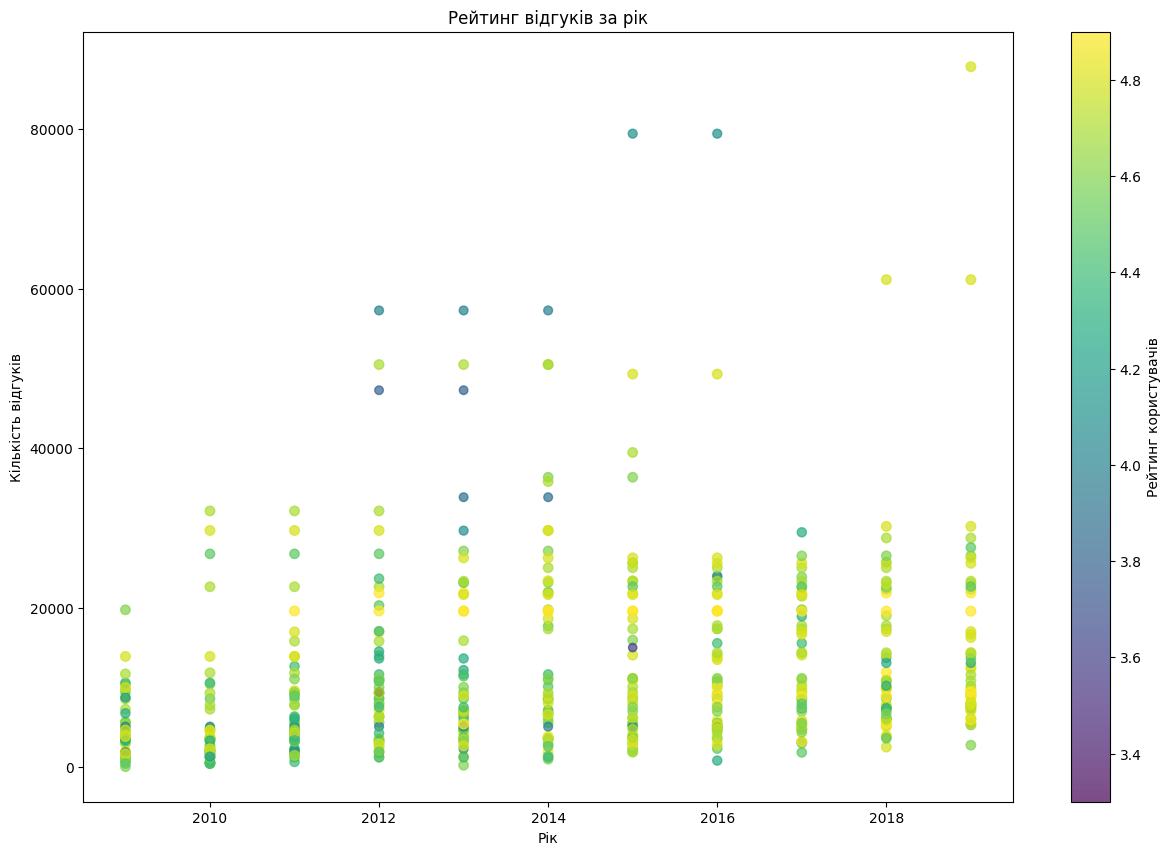

In [28]:
plt.figure(figsize=(15, 10))
plt.scatter(data['year'], data['reviews'], c=data['user_rating'], cmap='viridis', s=data['user_rating']*10, alpha=0.7)
plt.colorbar(label='Рейтинг користувачів')
plt.title('Рейтинг відгуків за рік')
plt.xlabel('Рік')
plt.ylabel('Кількість відгуків')
plt.show()

Графік 2

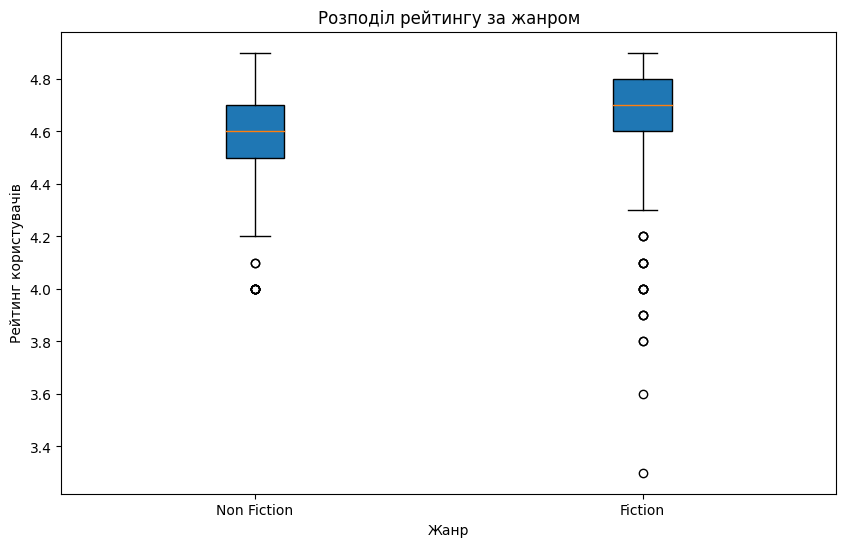

In [29]:
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['genre'] == genre]['user_rating'] for genre in data['genre'].unique()],
            labels=data['genre'].unique(), patch_artist=True)
plt.title('Розподіл рейтингу за жанром')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг користувачів')
plt.show()

Графік 3

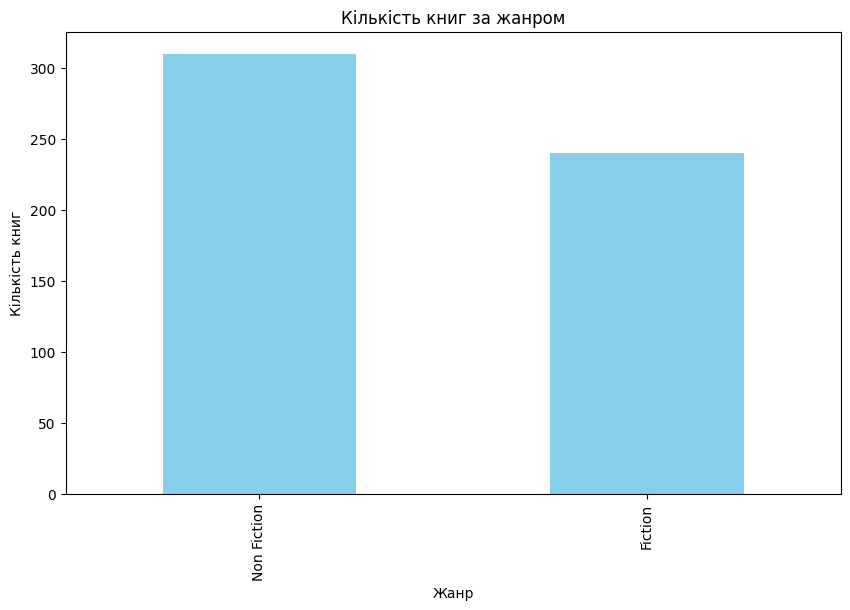

In [30]:
genre_counts = data['genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Кількість книг за жанром')
plt.xlabel('Жанр')
plt.ylabel('Кількість книг')
plt.show()